In [12]:
import pandas as pd
import numpy as np
#from matplotlib.plot import plt
import matplotlib
# display graphs inline
%matplotlib inline 

# Make graphs prettier
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 700)
#pd.set_option('display.mpl_style', 'default')
matplotlib.style.use('ggplot')
# Make the fonts bigger
matplotlib.rc('figure', figsize=(14, 7))
matplotlib.rc('font', weight='bold', size=15)
import seaborn as sns

In [2]:
consumer_complaint = pd.read_csv("data/consumer_complaints.csv", encoding='utf8', sep=',', parse_dates=True,low_memory=False)

In [3]:
consumer_complaint.rename(columns = {'consumer_disputed?':'consumer_disputed'},inplace = True)

In [4]:
len(consumer_complaint)

555957

In [5]:
consumer_complaint.head(2)

,date_received,product,sub_product,issue,sub_issue,...,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,09/03/2013,Closed with explanation,Yes,Yes,511080


In [6]:
complain_flag = '1'*len(consumer_complaint['state'])

In [7]:
consumer_complaint['complains'] = [ int(x) for x in complain_flag if not x  == ',']

In [8]:
consumer_complaint_state_wise = consumer_complaint.groupby('state').aggregate(np.sum)

In [9]:
consumer_complaint_state_wise.drop('complaint_id', axis = 1, inplace =  True)

# State wise complaint Analysis

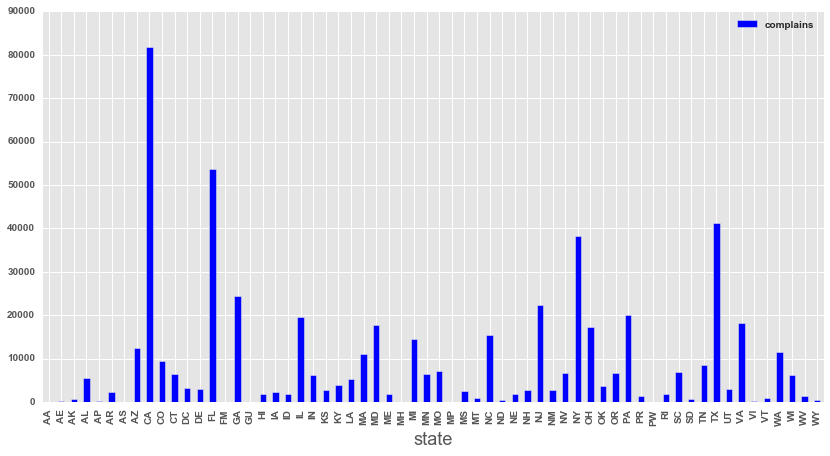

In [13]:
consumer_complaint_state_wise.plot(kind = 'bar')

# State(s) with maximum complaints

In [14]:
consumer_complaint_state_wise[consumer_complaint_state_wise['complains'] == consumer_complaint_state_wise['complains'].max()]

,complains
state,
CA,81700


# State(s) with Minimum complaints

In [15]:
consumer_complaint_state_wise[consumer_complaint_state_wise['complains'] == consumer_complaint_state_wise['complains'].min()]

,complains
state,
AA,9
PW,9


# Company wise Complaint Analysis

In [16]:
consumer_complaint_compnay_wise = consumer_complaint.groupby('company').aggregate(np.sum)
consumer_complaint_compnay_wise.drop('complaint_id', axis = 1, inplace =  True)

# Companies with Maximum  Complaints

In [17]:
consumer_complaint_compnay_wise[consumer_complaint_compnay_wise['complains'] == consumer_complaint_compnay_wise['complains'].max()]

,complains
company,
Bank of America,55998


# Compnaies with 10000 and more Complaints

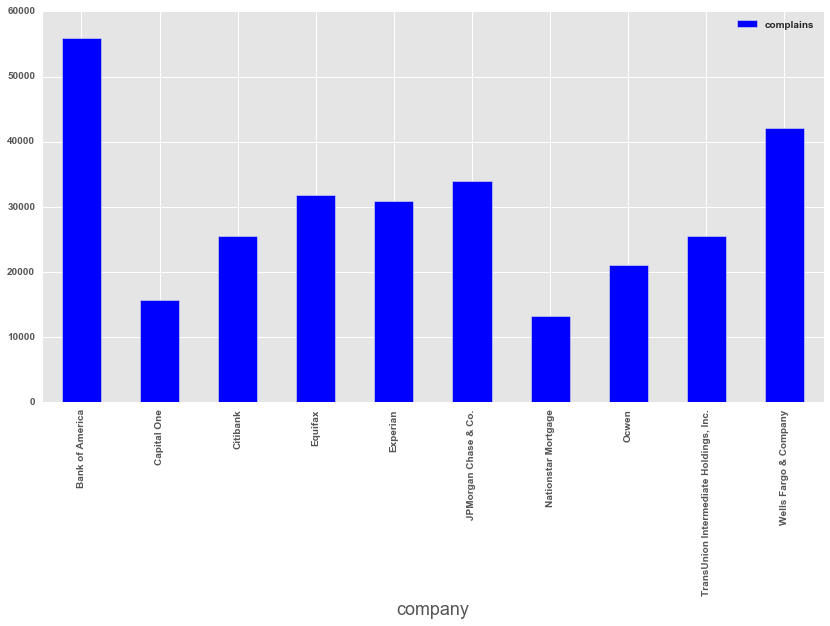

In [18]:
consumer_complaint_compnay_wise[consumer_complaint_compnay_wise['complains'] > 10000].plot(kind = 'bar')

# Product Wise Analysis

In [19]:
consumer_complaint_product_wise = consumer_complaint.groupby('product').aggregate(np.sum)
consumer_complaint_product_wise.drop('complaint_id', axis = 1, inplace =  True)

# Product with Most number of Complaints

In [20]:
consumer_complaint_product_wise[consumer_complaint_product_wise['complains'] == consumer_complaint_product_wise['complains'].max()]

,complains
product,
Mortgage,186475


# Product with Least number of Complaints

In [21]:
consumer_complaint_product_wise[consumer_complaint_product_wise['complains'] == consumer_complaint_product_wise['complains'].min()]

,complains
product,
Other financial service,557


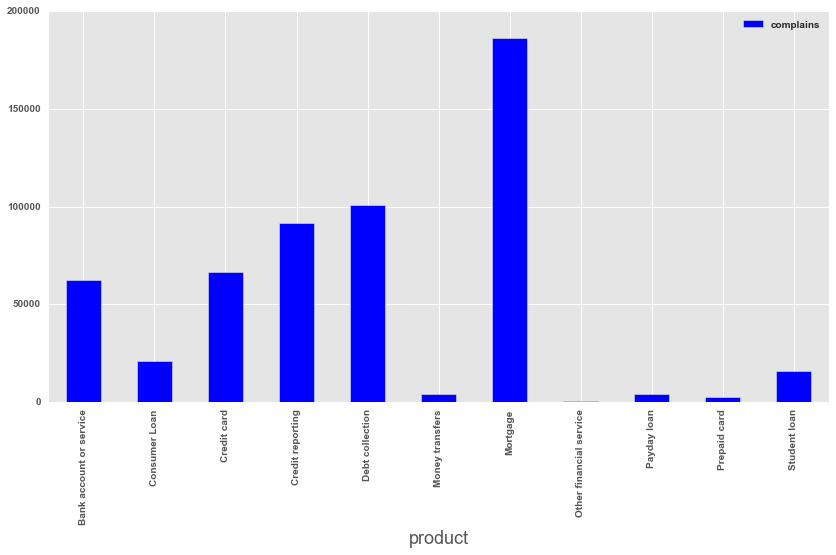

In [22]:
consumer_complaint_product_wise.plot(kind = 'bar')

# Companies with Best Customer Services

In [23]:
consumer_complaint_best_cc =  consumer_complaint[(consumer_complaint.timely_response == 'Yes') &
                                                 (consumer_complaint.consumer_disputed == 'No')]

In [24]:
len(consumer_complaint_best_cc)

431488

In [25]:
consumer_complaint_best_cc = consumer_complaint_best_cc.groupby('company').aggregate(np.sum)
consumer_complaint_best_cc.drop('complaint_id', axis = 1, inplace =  True)

In [26]:
consumer_complaint_best_cc[consumer_complaint_best_cc['complains'] == consumer_complaint_best_cc['complains'].max()]

,complains
company,
Bank of America,42248


# Wait but this is just showing number of complained resolved where customers have not disputed.We need to do more to find the best and worst companies when it comes to customer services.

In [84]:
#We will find the percenatge of timely resultions where costomer dispute is 'No'
consumer_complaint['percent_resolution'] = np.where((consumer_complaint.timely_response.str.contains('Yes') &
                                                                    consumer_complaint.consumer_disputed.str.contains('No')), 1, 0)

In [85]:
consumer_complaint.head()

,date_received,product,sub_product,issue,sub_issue,...,timely_response,consumer_disputed,complaint_id,complains,percent_resolution
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,...,Yes,Yes,511074,1,0
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,...,Yes,Yes,511080,1,0
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,...,Yes,No,510473,1,1
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,...,Yes,Yes,510326,1,0
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,...,Yes,Yes,511067,1,0


In [86]:
consumer_complaint_best_cc = consumer_complaint.groupby('company').aggregate(np.sum)
consumer_complaint_best_cc.drop('complaint_id', axis = 1, inplace =  True)

In [87]:
consumer_complaint_best_cc['percent_resolution'] = consumer_complaint_best_cc['percent_resolution']/consumer_complaint_best_cc['complains']

In [88]:
consumer_complaint_best_cc['percent_resolution']  = consumer_complaint_best_cc['percent_resolution'] .apply(lambda x : float(x*100))

# To Make it more fair ,let's consider companies with complains more than 5000'

In [92]:
consumer_complaint_best_cc= consumer_complaint_best_cc[consumer_complaint_best_cc['complains'] >= 5000]

In [97]:
consumer_complaint_best_cc.sort_values('percent_resolution', ascending = False)

,complains,percent_resolution
company,,
Experian,30905,87.390390
"TransUnion Intermediate Holdings, Inc.",25534,85.023890
Synchrony Financial,9435,85.013249
"Navient Solutions, Inc.",8007,81.116523
Capital One,15628,80.918864
Encore Capital Group,6304,80.805838
PNC Bank N.A.,6974,79.997132
Equifax,31828,79.115873
Citibank,25540,78.312451


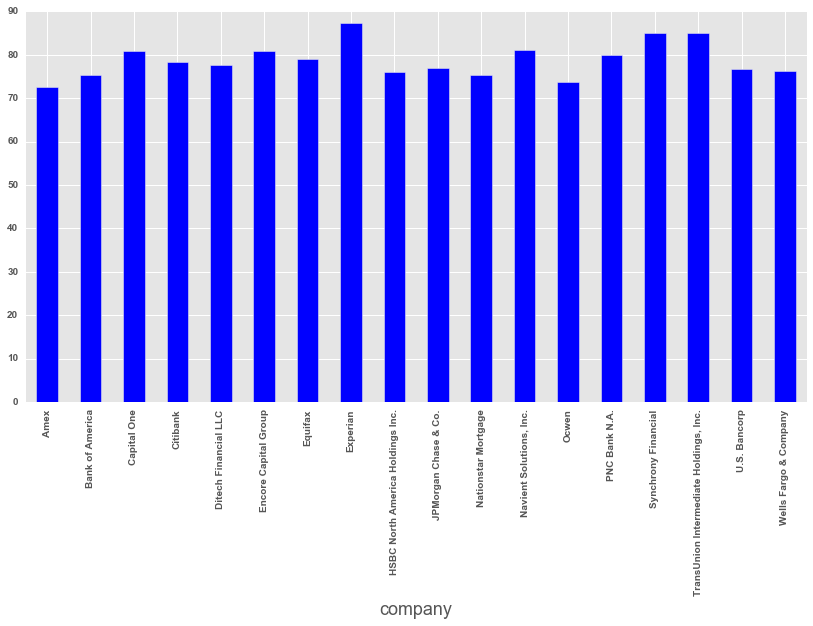

In [98]:
consumer_complaint_best_cc['percent_resolution'].plot(kind = 'bar')

# Experian is the compnay with Maxium resolution and costomer satisfaction.